In [144]:
import bs4
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Get box office page from Box Office Mojo
url = "https://www.boxofficemojo.com/title/tt7599146/"
box_office_page = requests.get(url)

In [32]:
# Use bs4 to get this selector: #a-page > main > div > div.a-section.a-spacing-none.a-spacing-top-base > div > div > table:nth-child(2)
soup = bs4.BeautifulSoup(box_office_page.text, 'html.parser')
performances_by_region = {
    'Domestic': soup.select("#a-page > main > div > div.a-section.a-spacing-none.a-spacing-top-base > div > div > table:nth-child(2)"),
    'Europe, Middle East and East Africa': soup.select("#a-page > main > div > div.a-section.a-spacing-none.a-spacing-top-base > div > div > table:nth-child(4)"),
    'Latin America': soup.select("#a-page > main > div > div.a-section.a-spacing-none.a-spacing-top-base > div > div > table:nth-child(6)"),
    'Asia Pacific': soup.select("#a-page > main > div > div.a-section.a-spacing-none.a-spacing-top-base > div > div > table:nth-child(8)"),
}

country_data = []

for region in performances_by_region:
    test_performance = performances_by_region[region]
    table = test_performance[0]
    rows = table.find_all('tr')[1:]

    # Iterate through the rows and extract information for each country
    for i_row, row in enumerate(rows):
        print(f"\nROW {i_row})")
        columns = row.find_all('td')
        for i_column, column in enumerate(columns):
            column_raw_text = str(column).replace("\n", "")
            column_value = column.get_text(strip=True)
            print(f"--> (COLUMN {i_column}) {column_value}")
        try:
            country = columns[0].get_text(strip=True)
            release_date = columns[1].get_text(strip=True)
            opening = columns[2].get_text(strip=True)
            gross = columns[3].find('span', class_='money').get_text(strip=True)

            country_data.append({
                'country': country,
                'release_date': release_date,
                'opening': opening,
                'gross': gross,
                'region': region
            })
        except Exception as exception:
            print(f"--> ERROR: {exception}")

country_data[0]['country'] = 'US, Canada and Puerto Rico'
for i, country in enumerate(country_data):
    for key, value in country.items():
        if value == '–':
            country_data[i][key] = 0

# Convert to dataframe
country_data = pd.DataFrame(country_data)


ROW 0)
--> (COLUMN 0) Domestic
--> (COLUMN 1) Jul 4, 2023
--> (COLUMN 2) $19,680,879
--> (COLUMN 3) $184,072,726

ROW 0)
--> (COLUMN 0) United Kingdom
--> (COLUMN 1) Sep 1, 2023
--> (COLUMN 2) $956,748
--> (COLUMN 3) $2,720,566

ROW 1)
--> (COLUMN 0) Saudi Arabia
--> (COLUMN 1) Aug 14, 2023
--> (COLUMN 2) –
--> (COLUMN 3) $2,165,925

ROW 2)
--> (COLUMN 0) Spain
--> (COLUMN 1) Oct 13, 2023
--> (COLUMN 2) $626,669
--> (COLUMN 3) $1,003,915

ROW 3)
--> (COLUMN 0) United Arab Emirates
--> (COLUMN 1) Aug 17, 2023
--> (COLUMN 2) $153,695
--> (COLUMN 3) $832,010

ROW 4)
--> (COLUMN 0) South Africa
--> (COLUMN 1) Aug 18, 2023
--> (COLUMN 2) $87,927
--> (COLUMN 3) $374,293

ROW 5)
--> (COLUMN 0) Croatia
--> (COLUMN 1) Aug 31, 2023
--> (COLUMN 2) $73,698
--> (COLUMN 3) $290,835

ROW 6)
--> (COLUMN 0) Nigeria
--> (COLUMN 1) Aug 18, 2023
--> (COLUMN 2) –
--> (COLUMN 3) $276,058

ROW 7)
--> (COLUMN 0) South Africa/Nigeria
--> (COLUMN 1) Aug 18, 2023
--> (COLUMN 2) –
--> (COLUMN 3) $276,058

ROW 8)

In [33]:
country_data

,country,release_date,opening,gross,region
0,"US, Canada and Puerto Rico","Jul 4, 2023","$19,680,879","$184,072,726",Domestic
1,United Kingdom,"Sep 1, 2023","$956,748","$2,720,566","Europe, Middle East and East Africa"
2,Saudi Arabia,"Aug 14, 2023",0,"$2,165,925","Europe, Middle East and East Africa"
3,Spain,"Oct 13, 2023","$626,669","$1,003,915","Europe, Middle East and East Africa"
4,United Arab Emirates,"Aug 17, 2023","$153,695","$832,010","Europe, Middle East and East Africa"
5,South Africa,"Aug 18, 2023","$87,927","$374,293","Europe, Middle East and East Africa"
6,Croatia,"Aug 31, 2023","$73,698","$290,835","Europe, Middle East and East Africa"
7,Nigeria,"Aug 18, 2023",0,"$276,058","Europe, Middle East and East Africa"
8,South Africa/Nigeria,"Aug 18, 2023",0,"$276,058","Europe, Middle East and East Africa"
9,Poland,"Sep 15, 2023","$82,558","$252,850","Europe, Middle East and East Africa"


In [44]:
'''
Format data:
    - country (no changes)
    - gross:            '$4,687,226'    -->     float(4687226.0)
    - opening:          '$415,942'      -->     float(415942.0)
    - release_date:     'Jun 10, 2021'  -->     '10/06/2021'
'''

month_to_number = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12',
}

country_data_formatted = pd.DataFrame(columns=['country', 'gross', 'opening', 'release_date', 'region'])

# Formats data
for i_country, country in country_data.iterrows():
    print(f"\n{i}) {country['country']} ({country['region']})")
    current_gross = country['gross']
    current_opening = country['opening']
    current_release_date = country['release_date']
    new_gross = float(current_gross.replace("$", "").replace(",", ""))
    new_opening = float(current_opening.replace("$", "").replace(",", "")) if current_opening else 0.0
    if current_release_date != None:
        new_release_date = current_release_date.replace(",", "").replace(" ", "/")
        new_release_date = new_release_date.split("/")
        day = new_release_date[1]
        month = month_to_number[new_release_date[0]]
        year = new_release_date[2]
        new_release_date = f"{day}/{month}/{year}"
    print(f"* gross: {current_gross} --> {new_gross}")
    print(f"* opening: {current_opening} --> {new_opening}")
    print(f"* release_date: {current_release_date} --> {new_release_date}")

    country_data_formatted = pd.concat([country_data_formatted, pd.DataFrame({
        'country': [country['country']],
        'gross': [new_gross],
        'opening': [new_opening],
        'release_date': [new_release_date],
        'region': [country['region']]
    })])


37) US, Canada and Puerto Rico (Domestic)
* gross: $184,072,726 --> 184072726.0
* opening: $19,680,879 --> 19680879.0
* release_date: Jul 4, 2023 --> 4/07/2023

37) United Kingdom (Europe, Middle East and East Africa)
* gross: $2,720,566 --> 2720566.0
* opening: $956,748 --> 956748.0
* release_date: Sep 1, 2023 --> 1/09/2023

37) Saudi Arabia (Europe, Middle East and East Africa)
* gross: $2,165,925 --> 2165925.0
* opening: 0 --> 0.0
* release_date: Aug 14, 2023 --> 14/08/2023

37) Spain (Europe, Middle East and East Africa)
* gross: $1,003,915 --> 1003915.0
* opening: $626,669 --> 626669.0
* release_date: Oct 13, 2023 --> 13/10/2023

37) United Arab Emirates (Europe, Middle East and East Africa)
* gross: $832,010 --> 832010.0
* opening: $153,695 --> 153695.0
* release_date: Aug 17, 2023 --> 17/08/2023

37) South Africa (Europe, Middle East and East Africa)
* gross: $374,293 --> 374293.0
* opening: $87,927 --> 87927.0
* release_date: Aug 18, 2023 --> 18/08/2023

37) Croatia (Europe, M

In [40]:
country_data_formatted

,country,gross,opening,release_date,region
0,"US, Canada and Puerto Rico",184072726.0,19680879.0,4/07/2023,Domestic
0,United Kingdom,2720566.0,956748.0,1/09/2023,"Europe, Middle East and East Africa"
0,Saudi Arabia,2165925.0,0.0,14/08/2023,"Europe, Middle East and East Africa"
0,Spain,1003915.0,626669.0,13/10/2023,"Europe, Middle East and East Africa"
0,United Arab Emirates,832010.0,153695.0,17/08/2023,"Europe, Middle East and East Africa"
0,South Africa,374293.0,87927.0,18/08/2023,"Europe, Middle East and East Africa"
0,Croatia,290835.0,73698.0,31/08/2023,"Europe, Middle East and East Africa"
0,Nigeria,276058.0,0.0,18/08/2023,"Europe, Middle East and East Africa"
0,South Africa/Nigeria,276058.0,0.0,18/08/2023,"Europe, Middle East and East Africa"
0,Poland,252850.0,82558.0,15/09/2023,"Europe, Middle East and East Africa"


In [55]:
all_countries_data = country_data_formatted
domestic_country_data = all_countries_data[all_countries_data['region'] == 'Domestic']
latin_america_country_data = all_countries_data[all_countries_data['region'] == 'Latin America']
europe_mid_east_east_africa_country_data = all_countries_data[all_countries_data['region'] == 'Europe, Middle East and East Africa']
asian_pacific_country_data = all_countries_data[all_countries_data['region'] == 'Asia Pacific']

In [163]:
# Plot functions
def plot_gross_and_opening(countries: list, gross_values: list, opening_values: list, region: str):
    # Replace None values with 0
    gross_values = [0 if value == None else value for value in gross_values]
    opening_values = [0 if value == None else value for value in opening_values]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a bar plot for gross
    ax.bar(countries, gross_values, label='Total', color='skyblue')
    # Create a bar plot for opening
    ax.bar(countries, opening_values, label='Estreia', color='orange', alpha=0.7)

    # Set labels and title
    ax.set_xlabel('País')
    ax.set_ylabel('Valor ($)')
    ax.set_title(f'Receita total e de estreia por país ({region})')
    ax.legend()

    # Set y-axis to be in dollars
    ax.get_yaxis().set_major_formatter(
        plt.FuncFormatter(
            lambda x, loc: "{:,}".format(int(x)).replace(',', '.')+',00'))

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()
   

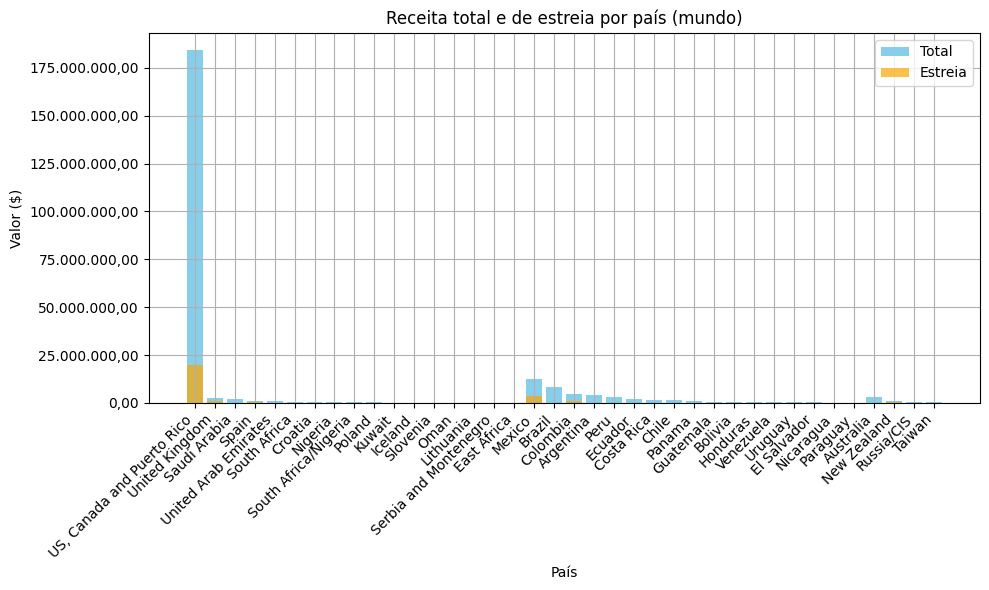

In [169]:
plot_gross_and_opening(
    countries=all_countries_data['country'].to_list(),
    gross_values=all_countries_data['gross'].to_list(),
    opening_values=all_countries_data['opening'].to_list(),
    region='mundo'
)

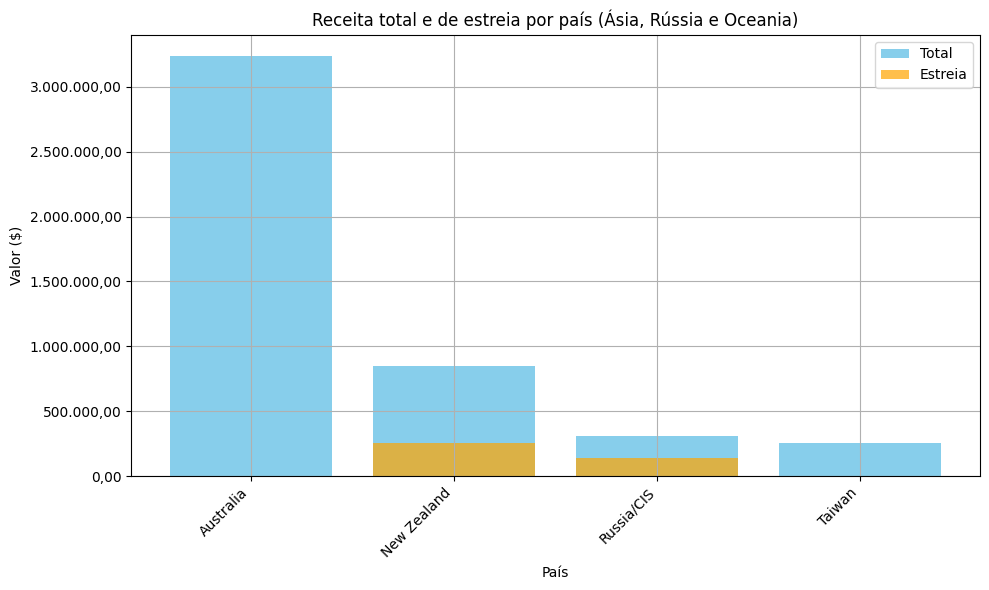

In [170]:
plot_gross_and_opening(
    countries=asian_pacific_country_data['country'].to_list(),
    gross_values=asian_pacific_country_data['gross'].to_list(),
    opening_values=asian_pacific_country_data['opening'].to_list(),
    region='Ásia, Rússia e Oceania'
)

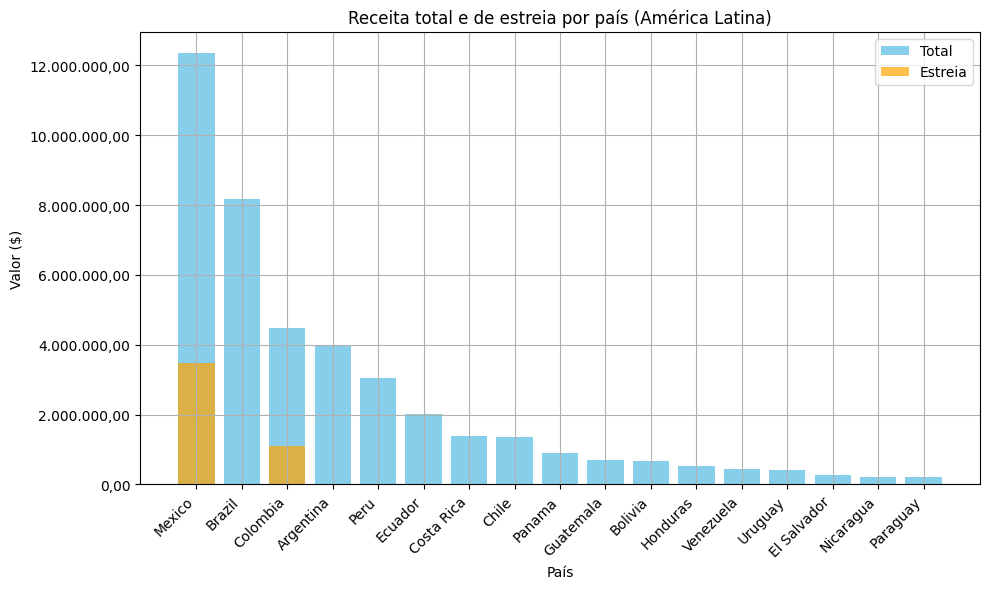

In [171]:
plot_gross_and_opening(
    countries=latin_america_country_data['country'].to_list(),
    gross_values=latin_america_country_data['gross'].to_list(),
    opening_values=latin_america_country_data['opening'].to_list(),
    region='América Latina'
)

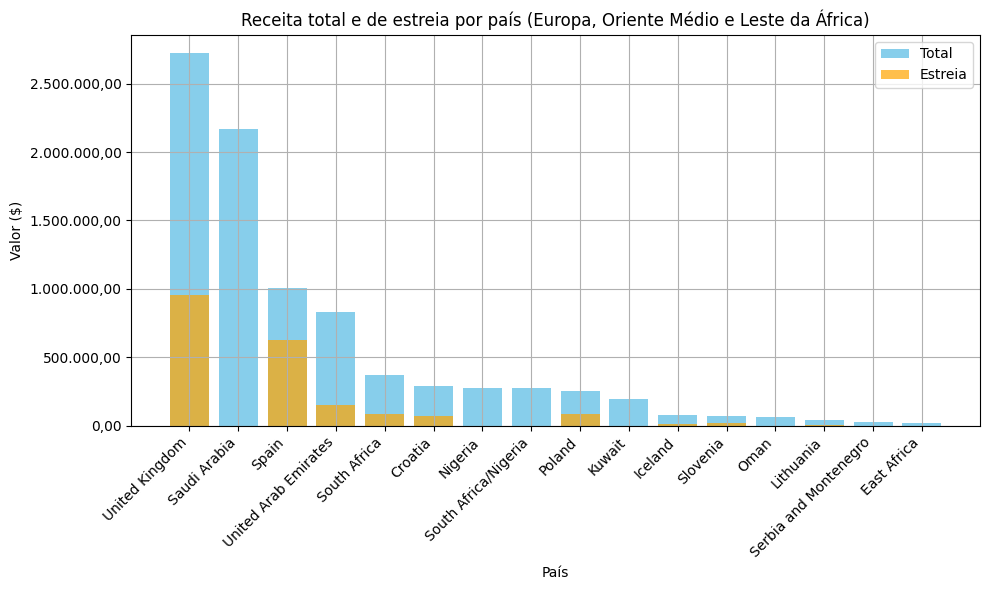

In [172]:
plot_gross_and_opening(
    countries=europe_mid_east_east_africa_country_data['country'].to_list(),
    gross_values=europe_mid_east_east_africa_country_data['gross'].to_list(),
    opening_values=europe_mid_east_east_africa_country_data['opening'].to_list(),
    region='Europa, Oriente Médio e Leste da África'
)

In [177]:
# Write to csv
all_countries_data.rename(
    columns={
        'country': 'País',
        'gross': 'Bilheteria (total)',
        'opening': 'Bilheteria (estreia)',
        'release_date': 'Data de lançamento',
        'region': 'Região'
    },
    inplace=True
)
all_countries_data.to_csv('../csv/box_office_world.csv', index=False)